In [ ]:
import os

for i in range(101):
    os.mkdir(str(i)) #---Cria as pastas do 0 ao 100
print("Pastas criadas!")

In [ ]:
import requests
import json

DADOS_ULTIMAS_3_HORAS = "https://api.ipma.pt/open-data/observation/meteorology/stations/obs-surface.geojson" #por exemplo se forem 9PM tem os dados entre 5PM e 7PM de hora a hora para todas as estações
DADOS_ULTIMAS_24_HORAS = "https://api.ipma.pt/open-data/observation/meteorology/stations/observations.json" #tem os dados das ultimas 24 horas para algumas estações

class make_api_call:
    def get_data(self, api):
        response = requests.get(f"{api}")
        if response.status_code == 200:
            print("sucessfully fetched the data")
            return response.json()
        else:
            print(f"Hello there, there's a {response.status_code} error with your request")
            
#---Define a função que vai transformar o valor da precipatação para um valor de 0 a 100
#---https://www.ipma.pt/pt/oclima/extremos.clima/ Vou usar o valor máximo aqui como referencia

def normalize_precipitation_value(precipitation_value):
  return int(round((precipitation_value/240)*100,0)) #o valor normalizado ta a ser arredondado pq as pastas sao de valores inteiros


In [ ]:
api_call_instance = make_api_call()
full_json_array = api_call_instance.get_data(DADOS_ULTIMAS_3_HORAS)

In [ ]:
# Extract specific attributes from each feature in the GeoJSON and store them in a list
selected_attributes = []

for feature in full_json_array['features']:
    # Extract only the 'name' and 'population' attributes from each feature
    idEstacao = feature['properties']['idEstacao']
    localEstacao = feature['properties']['localEstacao']
    precAcumulada = feature['properties']['precAcumulada']
    
    # Create a new dictionary with the selected attributes and append it to the list
    selected_attributes.append({'idEstacao': idEstacao, 'localEstacao': localEstacao, 'precAcumuladaNormalizada' : normalize_precipitation_value(max(0, precAcumulada))})

# Print the list of selected attributes
# print(json.dumps(selected_attributes, indent=2))

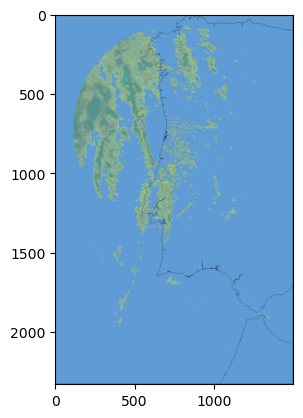

True

In [41]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image1 = cv2.imread("0.png")
image2 = cv2.imread("1.png")
image3 = cv2.imread("2.png")

list_images = []

list_images.append(image1)
list_images.append(image2)
list_images.append(image3)

img_mean = np.mean(list_images, axis=0).astype('uint8')

plt.imshow(result)
plt.show()

cv2.imwrite("result.png", result)

In [50]:
from PIL import Image

# Open the image file
image0n = np.array(Image.open("0.png").convert("RGBA"))
image1n = np.array(Image.open("1.png").convert("RGBA"))
image2n = np.array(Image.open("2.png").convert("RGBA"))

image1 = Image.fromarray(image0n)
image2 = Image.fromarray(image1n)
image3 = Image.fromarray(image2n)
    
# Create a new blank image with the same size as image1
result_image = Image.new("RGBA", image1.size)

# Paste image1 onto the result image with alpha blending
result_image.paste(image1, (0, 0))
result_image = Image.blend(result_image, image2, alpha=0.5)
result_image = Image.blend(result_image, image3, alpha=0.5)

result_image.convert("RGB")
# Save the image with a new filename and format
result_image.save("example_modified.png", "PNG")

# Close the image file
image1.close()
image2.close()
image3.close()
result_image.close()